In [107]:
!pip install icecream

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from icecream import ic

In [109]:
dreams_df = pd.read_csv('Scary Dreams.csv')

In [110]:
dreams_df.head()

,Month,scary dreams: (United States)
0,2009-01,30
1,2009-02,23
2,2009-03,27
3,2009-04,8
4,2009-05,18


In [111]:
dreams_df.dtypes

Month                            object
scary dreams: (United States)     int64
dtype: object

In [112]:
dreams_df['Month'] = dreams_df['Month'].astype('datetime64[ns]')
dreams_df.dtypes
dreams_df['Month']
dreams_df

,Month,scary dreams: (United States)
0,2009-01-01,30
1,2009-02-01,23
2,2009-03-01,27
3,2009-04-01,8
4,2009-05-01,18
...,...,...
172,2023-05-01,68
173,2023-06-01,65
174,2023-07-01,61
175,2023-08-01,62


In [113]:
dreams_df['dreams'] = dreams_df['scary dreams: (United States)']
dreams_df = dreams_df.drop('scary dreams: (United States)', axis=1)
dreams_df.rename(columns = {'Month':'date'}, inplace = True)
dreams_df.head()

,date,dreams
0,2009-01-01,30
1,2009-02-01,23
2,2009-03-01,27
3,2009-04-01,8
4,2009-05-01,18


In [114]:
dreams_df['year'] = dreams_df['date'].dt.year
dreams_df['month'] = dreams_df['date'].dt.month
dreams_df.head()

,date,dreams,year,month
0,2009-01-01,30,2009,1
1,2009-02-01,23,2009,2
2,2009-03-01,27,2009,3
3,2009-04-01,8,2009,4
4,2009-05-01,18,2009,5


In [115]:
dreams_df = dreams_df[['date', 'year', 'month', 'dreams']]
dreams_df.dtypes

date      datetime64[ns]
year               int64
month              int64
dreams             int64
dtype: object

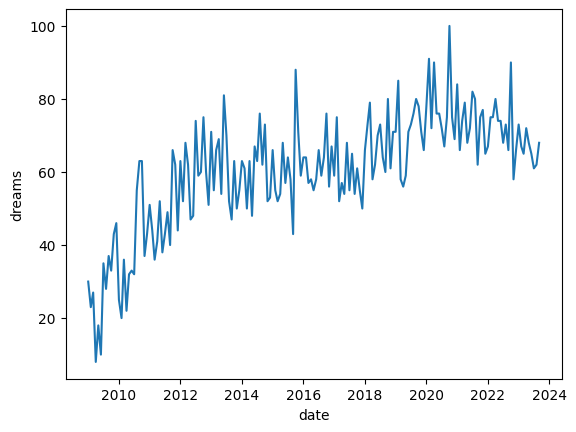

In [116]:
sns.lineplot(data=dreams_df, x='date', y='dreams');

In [117]:
dreams_min_max = dreams_df.groupby(['year', 'month'])['dreams'].sum().reset_index()
print("Year and month with the most dreams:\n", dreams_min_max[dreams_min_max['dreams']==dreams_min_max['dreams'].max()], "\n")
print("Year and month with the least dreams:\n", dreams_min_max[dreams_min_max['dreams']==dreams_min_max['dreams'].min()])

Year and month with the most dreams:
      year  month  dreams
141  2020     10     100 

Year and month with the least dreams:
    year  month  dreams
3  2009      4       8


In [118]:
dreams_monthly = dreams_df[['month', 'dreams']].groupby('month')['dreams'].sum().reset_index()
dreams_monthly

,month,dreams
0,1,931
1,2,906
2,3,867
3,4,869
4,5,835
5,6,888
6,7,931
7,8,923
8,9,881
9,10,1021


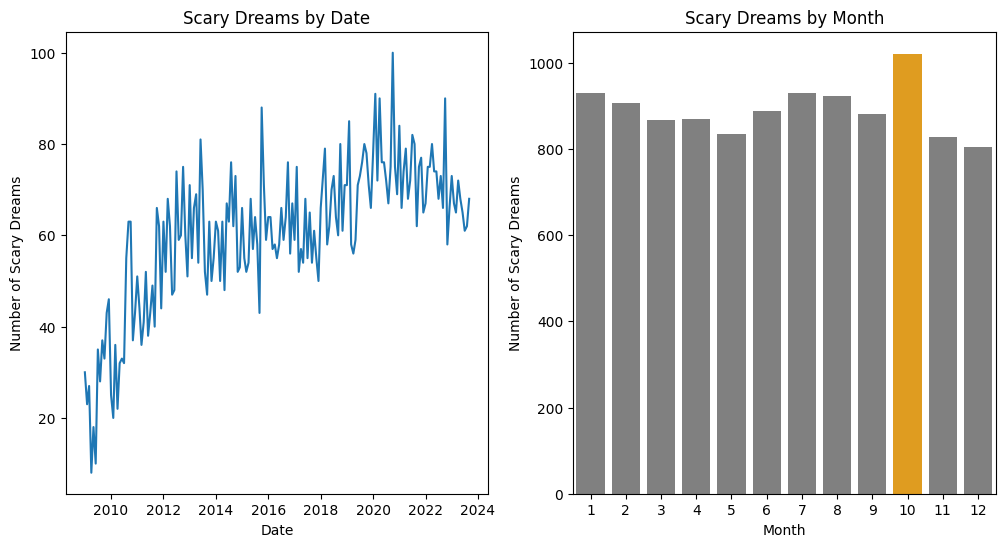

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.lineplot(data=dreams_df, x='date', y='dreams', ax=axes[0]).set(title='Scary Dreams by Date', xlabel='Date', ylabel ='Number of Scary Dreams')
sns.barplot(data=dreams_monthly, x='month', y='dreams', ax=axes[1], palette=['grey' if (x < max(dreams_monthly['dreams'])) else 'orange' for x in dreams_monthly['dreams']]).set(title='Scary Dreams by Month', xlabel='Month', ylabel='Number of Scary Dreams');
# show highest total per month ever, lowest total month ever
# show prime numbers
# show fibonacci numbers

fig.show()

In [120]:
#start prediction work
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as stats

In [121]:
dreams_df.head()

,date,year,month,dreams
0,2009-01-01,2009,1,30
1,2009-02-01,2009,2,23
2,2009-03-01,2009,3,27
3,2009-04-01,2009,4,8
4,2009-05-01,2009,5,18


In [122]:
dreams_df['date_cont'] = dreams_df.date.astype(int)/10**11
dreams_df

,date,year,month,dreams,date_cont
0,2009-01-01,2009,1,30,12307680.0
1,2009-02-01,2009,2,23,12334464.0
2,2009-03-01,2009,3,27,12358656.0
3,2009-04-01,2009,4,8,12385440.0
4,2009-05-01,2009,5,18,12411360.0
...,...,...,...,...,...
172,2023-05-01,2023,5,68,16828992.0
173,2023-06-01,2023,6,65,16855776.0
174,2023-07-01,2023,7,61,16881696.0
175,2023-08-01,2023,8,62,16908480.0


In [123]:
dreams_train_df = dreams_df.sample(frac=0.8, random_state=42)
dreams_test_df = dreams_df.drop(dreams_train_df.index)
print("training data shape: ", dreams_train_df.shape)
print("testing data shape: ", dreams_test_df.shape)

training data shape:  (142, 5)
testing data shape:  (35, 5)


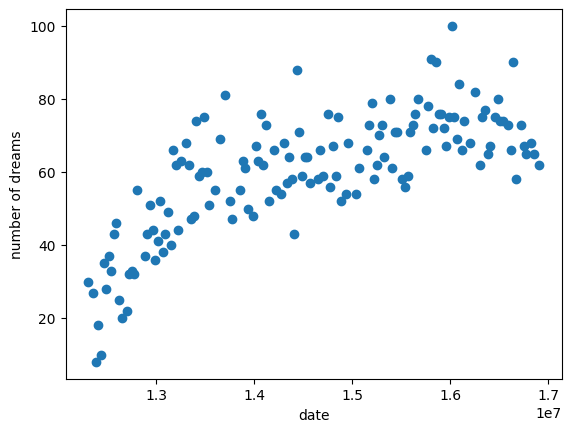

In [124]:
plt.scatter(dreams_train_df.date_cont, dreams_train_df.dreams)
plt.xlabel('date')
plt.ylabel('number of dreams')
plt.show()

In [125]:
x_train = dreams_train_df.date_cont
y_train = dreams_train_df.dreams

In [126]:
model_dreams = stats.OLS(y_train, x_train)
results_dreams = model_dreams.fit()

In [127]:
print(results_dreams.summary())

                                 OLS Regression Results                                
Dep. Variable:                 dreams   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              3021.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):                    4.02e-97
Time:                        15:53:45   Log-Likelihood:                         -567.21
No. Observations:                 142   AIC:                                      1136.
Df Residuals:                     141   BIC:                                      1139.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [128]:
date_coeff = results_dreams.params[0]
ssr_dreams = results_dreams.ssr

# print('The intercept value is {:.3f}'.format(intercept_dreams))
# print('The coefficient (slope) for the years of experience independent variable is {:.3f}'.format(date_coeff))
# print('The sum of square residuals is {:.1f}'.format(ssr_dreams))
print("date coefficient: ", date_coeff)
print("sum of square residuals: ", ssr_dreams)

date coefficient:  4.156352264869282e-06
sum of square residuals:  24509.681202932035


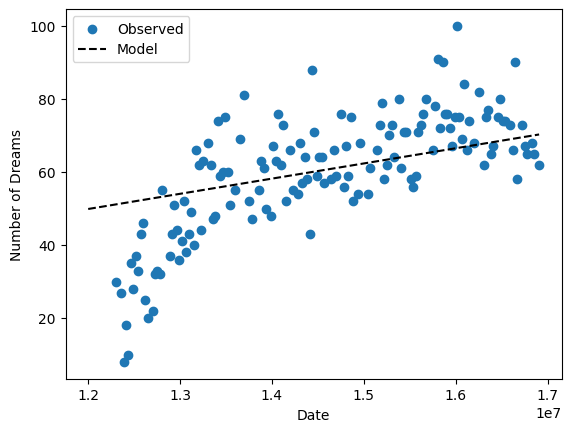

In [129]:
x_synthetic = np.linspace(12000000,dreams_train_df.date_cont.max(), 50)
y_pred_dreams = date_coeff*x_synthetic + 0 #intercept is zero
plt.scatter(dreams_train_df.date_cont, dreams_train_df.dreams, label='Observed')
plt.plot(x_synthetic, y_pred_dreams, color='k', ls='--', label='Model')
plt.xlabel('Date')
plt.ylabel('Number of Dreams')
plt.legend()
plt.show()

In [130]:
x_test = dreams_test_df.date_cont
y_test = dreams_test_df.dreams

In [131]:
test_predictions = results_dreams.predict(x_test)

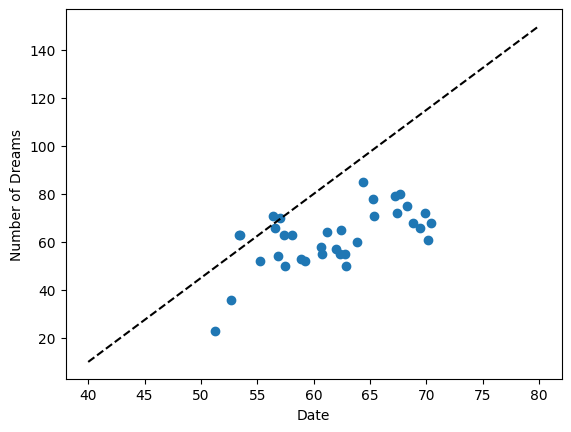

In [132]:
plt.scatter(test_predictions, y_test)
plt.plot([40, 80], [10, 150], c='k', ls='--')
plt.xlabel('Date')
plt.ylabel('Number of Dreams')
plt.show();